### Initial Setup

In [1]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

sns.set_theme(style="dark")

In [2]:
df = pd.read_csv("./datasets/proc/variables.csv.zip", index_col=0, parse_dates=["date"])
df.head()

,date,ICON,IEEX,IFNC,IMAT,IMOB,INDX,UTIL,DOLLAR,GDP,IPCA,SELIC,VIX
0,2007-12-28,1077.90,17305.63,2742.89,2266.68,1000.00,9957.43,1616.45,1.7673,726339.305495,0.54,0.042065,20.740000
1,2008-01-02,1062.92,17005.44,2633.96,2215.22,975.37,9778.31,1608.15,1.7645,712055.248958,0.49,0.042065,23.170000
2,2008-01-04,1048.14,16893.17,2583.73,2171.25,952.34,9647.16,1597.60,1.7572,712055.248958,0.49,0.042065,23.940001
3,2008-01-07,1044.37,16934.50,2603.15,2125.57,950.63,9529.71,1603.98,1.7640,712055.248958,0.49,0.045584,23.790001
4,2008-01-08,1044.14,17054.26,2638.25,2161.35,954.55,9601.26,1615.72,1.7520,712055.248958,0.49,0.048230,25.430000


### Visualizing all the Data

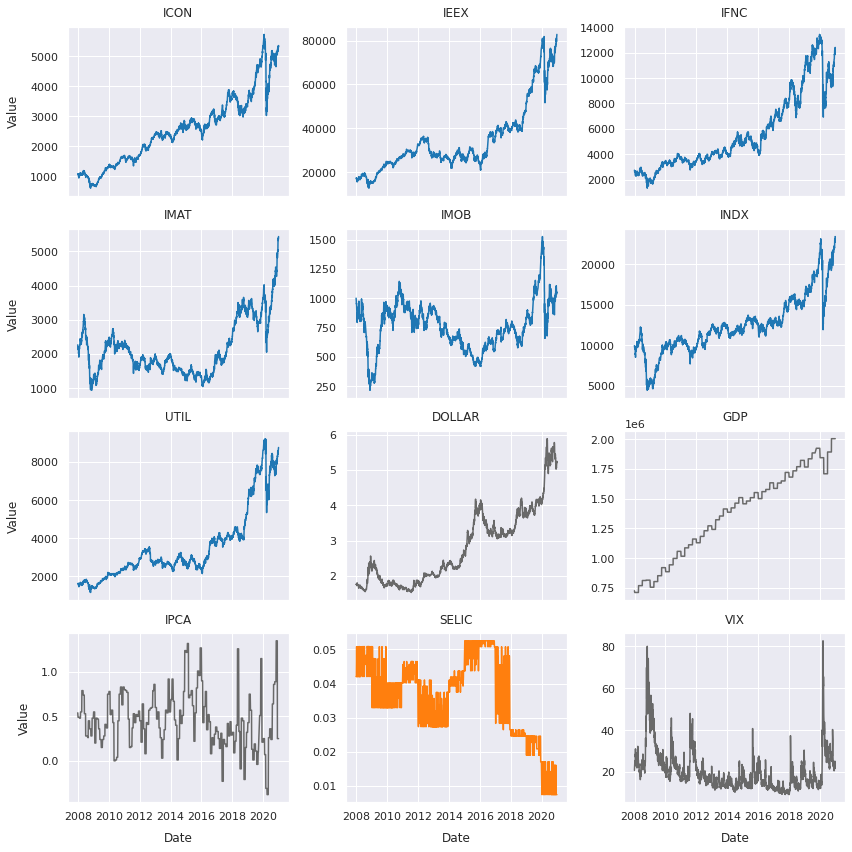

In [3]:
fig, ax = plt.subplots(4,3, figsize=(12,12), sharex=True)

colors = ['tab:blue', 'tab:blue', 'tab:blue', 'tab:blue', 'tab:blue', 'tab:blue', 'tab:blue',
          'dimgrey', 'dimgrey', 'dimgrey', 'tab:orange', 'dimgrey']

for i, col in enumerate(df.columns):
    if col != 'date':
        ax[(i-1)//3, (i-1)%3].plot(df["date"], df[col], c=colors[i-1])
        
        if((i-1)%3) == 0:
            ax[(i-1)//3, (i-1)%3].set_ylabel("Value", labelpad=10)
            
        ax[(i-1)//3, (i-1)%3].grid()
        ax[(i-1)//3, (i-1)%3].set_title(col, pad=10)
        #ax[(i-1)//3, (i-1)%3].legend([col], loc='upper left')
        
ax[0,0].set_ylabel("Value", labelpad=10)
ax[1,0].set_ylabel("Value", labelpad=10)
ax[2,0].set_ylabel("Value", labelpad=10)

ax[3,0].set_xlabel("Date", labelpad=10)
ax[3,1].set_xlabel("Date", labelpad=10)
ax[3,2].set_xlabel("Date", labelpad=10)
plt.tight_layout()
plt.show()

### Visualizing Effects of Processing on the Data

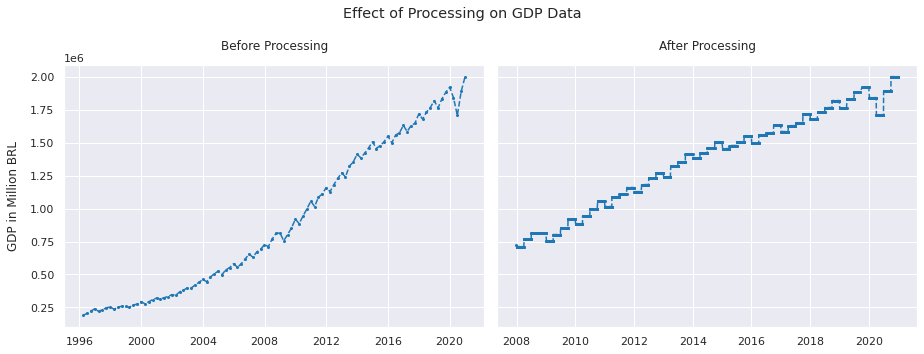

In [4]:
df_gdp = pd.read_csv("./datasets/raw/explanatory/gdp.csv.zip", usecols=['date', 'rate_value'], parse_dates=["date"])

fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(13,5))

ax1.plot(df_gdp['date'], df_gdp['rate_value'], '--o', c='tab:blue', markersize=2)
ax1.set_ylabel('GDP in Million BRL', labelpad=10)
ax1.set_title('Before Processing', pad=15)
ax1.grid()

ax2.plot(df['date'], df['GDP'], '--o', c='tab:blue', markersize=2)
ax2.set_title('After Processing', pad=15)
ax2.grid()

fig.suptitle('Effect of Processing on GDP Data')
plt.tight_layout()
plt.show()

### Visualizing Trends in the Data

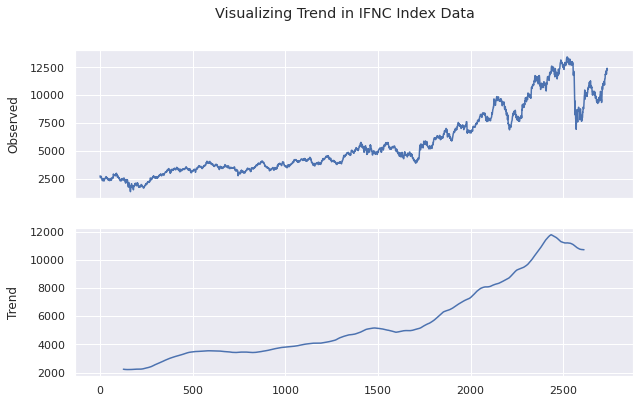

In [5]:
res = seasonal_decompose(df['IFNC'], model='additive', period=253)

fig, axes = plt.subplots(2,1, sharex=True, figsize=(10,6))

res.observed.plot(ax=axes[0], legend=False)
axes[0].set_ylabel('Observed', labelpad=10)
axes[0].grid()

res.trend.plot(ax=axes[1], legend=False)
axes[1].set_ylabel('Trend', labelpad=10)
axes[1].grid()

fig.suptitle('Visualizing Trend in IFNC Index Data')
plt.show()

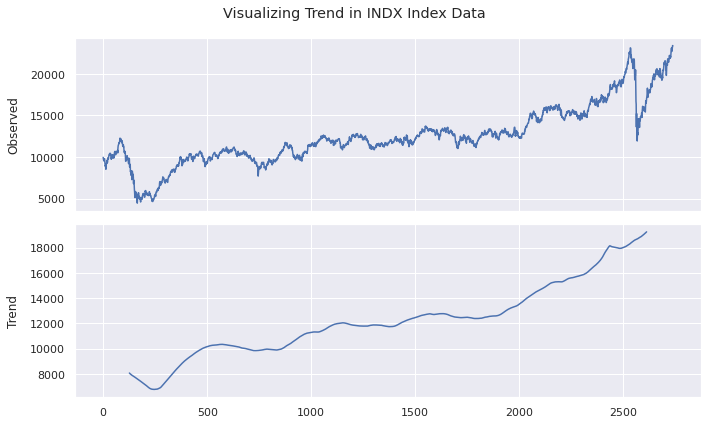

In [6]:
res = seasonal_decompose(df['INDX'], model='additive', period=253)

fig, axes = plt.subplots(2,1, sharex=True, figsize=(10,6))

res.observed.plot(ax=axes[0], legend=False)
axes[0].set_ylabel('Observed', labelpad=10)
axes[0].grid()

res.trend.plot(ax=axes[1], legend=False)
axes[1].set_ylabel('Trend', labelpad=10)
axes[1].grid()

fig.suptitle('Visualizing Trend in INDX Index Data')
plt.tight_layout()
plt.show()

### Visualizing Seasonality in the Data

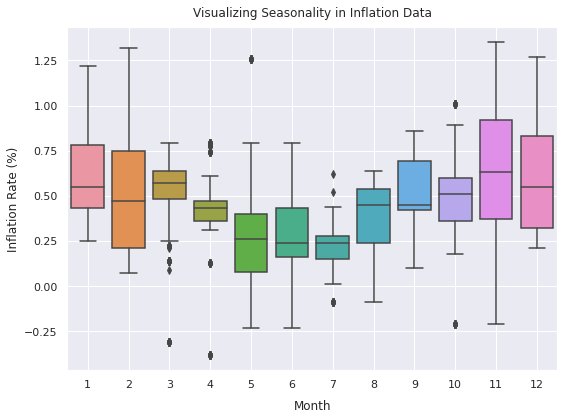

In [7]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x=pd.DatetimeIndex(df['date']).month, y='IPCA')
plt.grid()
plt.xlabel('Month', labelpad=10)
plt.ylabel('Inflation Rate (%)')
plt.title('Visualizing Seasonality in Inflation Data', pad=10)
plt.tight_layout()
plt.show()

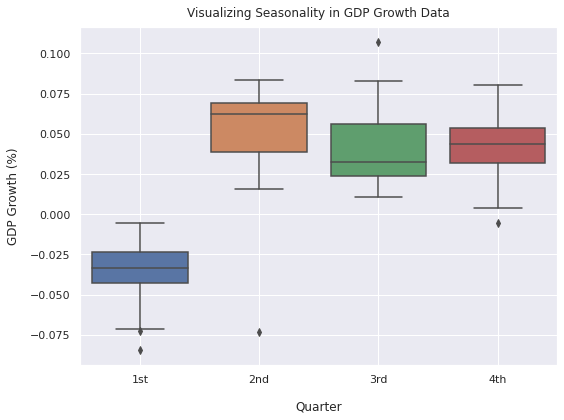

In [8]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x=pd.DatetimeIndex(df_gdp['date']).quarter, y=df_gdp['rate_value'].pct_change())
plt.grid()
plt.xlabel('Quarter', labelpad=15)
plt.ylabel('GDP Growth (%)', labelpad=10)
plt.title('Visualizing Seasonality in GDP Growth Data', pad=10)
plt.xticks(ticks=[0,1,2,3], labels=['1st', '2nd', '3rd', '4th'])
plt.tight_layout()
plt.show()